# MU4MEF04 –Méthodes Numériques pour les écoulements incompressibles- S1


## TP1 Approximation par différences finies

### Master SPI – MSH
#### ZHOU Zixin 28609845

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sps
from numpy import polyfit 
import math

On considère
$$
f(x)=200 e^{-20 x} \sin (20 \pi x)
$$

sur [0, 1].

### 1.Représenter f sur une grille régulière de N=101 points.

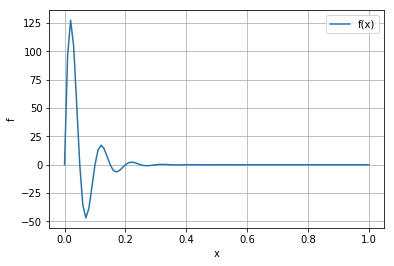

In [2]:
n      = 101
x      = np.linspace(0,1,n)
f      = 200 * np.exp(-20 * x) * (np.sin(20 * math.pi * x))

plt.figure()
plt.xlabel("x")
plt.ylabel("f")
plt.grid()
plt.plot(x,f,label="f(x)")
#plt.title("F en fonction de x sur une grille régulière de 101 points")
plt.legend() 
plt.show()

### 2.Calculer par différences finies centrées la dérivée de $f$ sur la grille. Pour obtenir une différence centrée aux bornes on extrapolera à l’extérieur de l’intervalle [0, 1]. Comparer avec la dérivée exacte $f^{\prime}$. Calculer l’erreur d’approximation $e_{L^{ 2}}$.

On utilisera 
$$
f^{\prime}(x_{i}) \sim \frac{f(x_{i+1})-f(x_{i-1})}{2 \Delta x}
$$

$$
e_{L^{ 2}}=\left[ \frac{1}{N}\Sigma_{i}^{N} \left|f^{\prime}(x_{i})_{DF}-f^{\prime}(x_{i})_{ Analytique}\right|^{2} \right]^{\frac{1}{2}}
$$

La dérivée exacte $f^{\prime}$ est :
$$
f^{\prime}=4000e^{-20x}(\pi cos(20\pi x)-sin(20\pi x))
$$

Pour N = 101, l'erreur d'approximation est 99.46980540906972


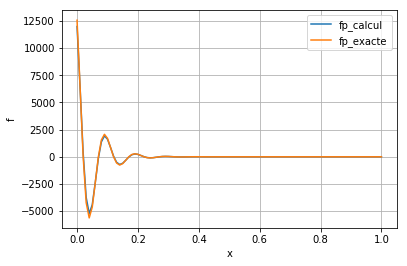

In [3]:
# Schéma centrée

n      = 101
x      = np.linspace(0,1,n)
dx     = x[1]-x[0]                                      #La taille du maillage

fp_e   = 4000 * np.exp(-20 * x) * (math.pi * np.cos(20 * math.pi * x)-np.sin(20 * math.pi * x))         #La dérivée exacte
fp_c   = np.zeros(len(f))                               #La dérivée calculée

erreur = []                                             #L’erreur d’approximation
taille = []                                             #La taille de la grille

taille.append(dx)


for i in range(1,100):
    fp_c[i] = (f[i+1]-f[i-1])/(2*dx)
    
    
#Extrapolation à l'extérieur de l'intervalle

f_g      = 200 * np.exp(-20 * (-dx)) * (np.sin(20 * math.pi * (-dx)))     
f_d      = 200 * np.exp(-20 * (1+dx)) * (np.sin(20 * math.pi * (1 + dx)))
fp_c[0]  = (f[1] - f_g)/(2 * dx)
fp_c[-1] = (f_d - f[-2])/(2 * dx)


#Erreur d'approximation

e = np.sqrt(dx * np.sum((np.abs(fp_c - fp_e) ** 2)))
erreur.append(e)

print "Pour N = 101, l'erreur d'approximation est", e

plt.figure()
plt.xlabel("x")
plt.ylabel("f")
plt.grid()
plt.plot(x,fp_c,label="fp_calcul")
plt.plot(x,fp_e,label="fp_exacte")
plt.legend() 
plt.show()    

### 3. Recommencer avec N = 500, N = 1000, N = 2000 ...

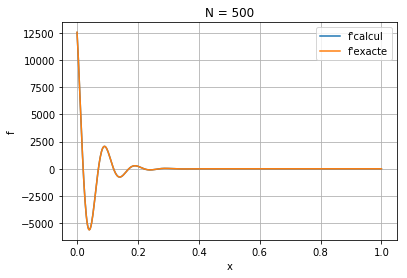

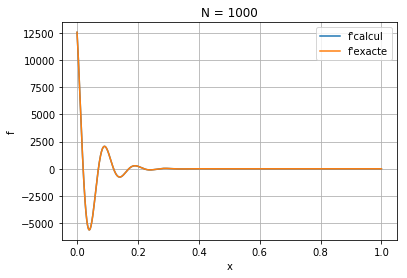

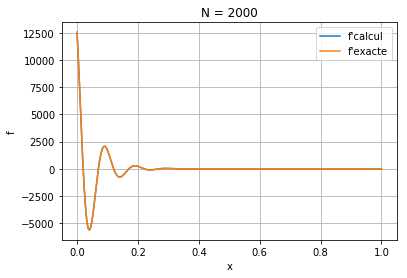

Pour N = 500, l'erreur d'approximation est 3.65834439254792
Pour N = 1000, l'erreur d'approximation est 0.9030893371941189
Pour N = 2000, l'erreur d'approximation est 0.22436185084245225


In [4]:

# N = 500,1000,2000

for n in [500,1000,2000]:
    x    = np.linspace(0,1,n)
    f    = 200 * np.exp(-20 * x) * (np.sin(20 * math.pi * x))
    fp_e = 4000 * np.exp(-20 * x) * (math.pi * np.cos(20 * math.pi * x) - np.sin(20 * math.pi * x))
    
    dx   = x[1] - x[0]
    taille.append(dx)
    fp_c = np.zeros(len(f))

    for i in range(1,n-1):
        fp_c[i] = (f[i+1] - f[i-1])/(2 * dx)
        
    f_g      = 200 * np.exp(-20 * (-dx)) * (np.sin(20 * math.pi * (-dx)))
    f_d      = 200 * np.exp(-20 * (1 + dx)) * (np.sin(20 * math.pi * (1 + dx)))
    fp_c[0]  = (f[1] - f_g)/(2 * dx)
    fp_c[-1] = (f_d - f[-2])/(2 * dx)

    e = np.sqrt(dx * np.sum((np.abs(fp_c - fp_e) ** 2)))
    erreur.append(e)
    
    plt.figure()
    plt.title("N = %d" %n)
    plt.xlabel("x")
    plt.ylabel("f")
    plt.grid()
    plt.plot(x,fp_c,label="f'calcul")
    plt.plot(x,fp_e,label="f'exacte")
    plt.legend() 
    plt.show()
    
print "Pour N = 500, l'erreur d'approximation est", erreur[1]    
print "Pour N = 1000, l'erreur d'approximation est", erreur[2] 
print "Pour N = 2000, l'erreur d'approximation est", erreur[3]     

### 4. Représenter l’erreur en fonction de la taille de la grille. Quel est l’ordre de la méthode d’approximation?

Pour avoir l'order de cette méthode d’approximation, on a besion de tracer la courbe $log(\Delta x)$ en fonction de $log(erreur)$

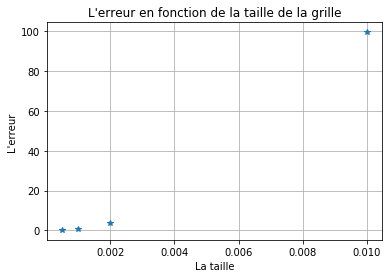

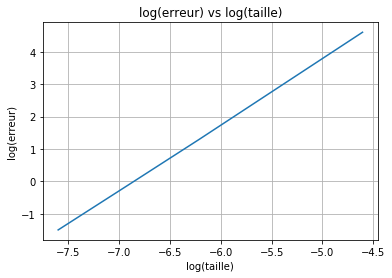

La pente de la courbe est  2.036100340000653


In [5]:
# L’erreur en fonction de la taille de la grille

plt.figure()
plt.title("L'erreur en fonction de la taille de la grille")
plt.xlabel("La taille")
plt.ylabel("L'erreur")
plt.grid()
plt.plot(taille,erreur,"*")
plt.show() 


# 𝑙𝑜𝑔(Δ𝑥) vs 𝑙𝑜𝑔(𝑒𝑟𝑟𝑒𝑢𝑟)
plt.figure()
plt.title("log(erreur) vs log(taille)")
plt.xlabel("log(taille)")
plt.ylabel("log(erreur)")
plt.grid()
plt.plot(np.log(taille),np.log(erreur))
plt.show() 


parameter = np.polyfit(np.log(taille), np.log(erreur), 1)
print"La pente de la courbe est ", parameter[0]

Donc, l'ordre de cette méthode d'approximation est 2. Cette valeur est en cohérence avec la valeur théorie.

### 5.  Recommencer avec un schéma décentré amont (extrapoler lorsque c’est nécessaire). Comparer avec la solution analytique $f^{\prime}$ (calculer l’erreur). Quel est l’ordre de la méthode d’approximation?

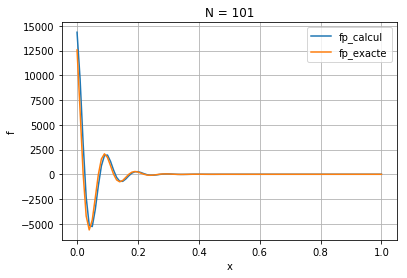

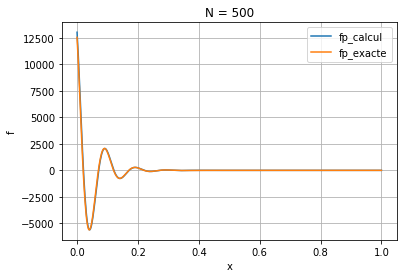

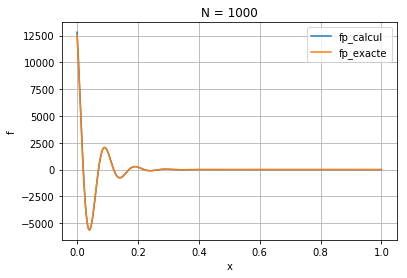

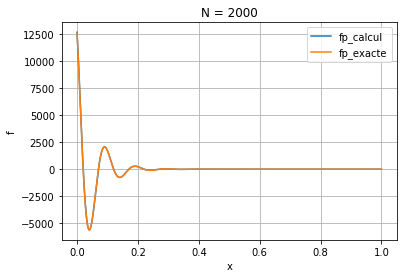

Pour N = 101, l'erreur d'approximation est 557.9557015140151
Pour N = 500, l'erreur d'approximation est 110.2590069032242
Pour N = 1000, l'erreur d'approximation est 54.685233004752774
Pour N = 2000, l'erreur d'approximation est 27.219518727627193


In [6]:
# Schéma décentré amont

erreur = []
taille = []


for n in [101,500,1000,2000]:
    x    = np.linspace(0,1,n)
    f    = 200 * np.exp(-20 * x) * (np.sin(20 * math.pi * x))
    fp_e = 4000 * np.exp(-20 * x) * (math.pi * np.cos(20 * math.pi * x)-np.sin(20 * math.pi * x))
    
    dx   = x[1] - x[0]
    taille.append(dx)
    fp_c = np.zeros(len(f))

    for i in range(1,n-1):
        fp_c[i] = (f[i] - f[i-1])/(dx)
        
    f_g      = 200 * np.exp(-20 * (-dx)) * (np.sin(20 * math.pi * (-dx)))
    fp_c[0]  = (f[0]-f_g)/(dx)

    e = np.sqrt(dx * np.sum((np.abs(fp_c - fp_e) ** 2)))
    erreur.append(e)
    
    plt.figure()
    plt.title("N = %d" %n)
    plt.xlabel("x")
    plt.ylabel("f")
    plt.grid()
    plt.plot(x,fp_c,label="fp_calcul")
    plt.plot(x,fp_e,label="fp_exacte")
    plt.legend() 
    plt.show()
    
print "Pour N = 101, l'erreur d'approximation est", erreur[0]   
print "Pour N = 500, l'erreur d'approximation est", erreur[1]    
print "Pour N = 1000, l'erreur d'approximation est", erreur[2] 
print "Pour N = 2000, l'erreur d'approximation est", erreur[3] 


<Figure size 432x288 with 0 Axes>

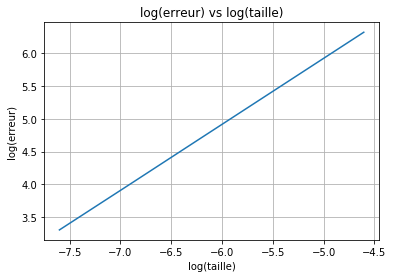

La pente de la courbe est  1.0085818836321605


In [7]:
# log(erreur) en fonction de log(taille de la grille)

plt.figure()
plt.figure()
plt.title("log(erreur) vs log(taille)")
plt.xlabel("log(taille)")
plt.ylabel("log(erreur)")
plt.grid()
plt.plot(np.log(taille),np.log(erreur))
plt.show() 


parameter = np.polyfit(np.log(taille), np.log(erreur), 1)
print"La pente de la courbe est ", parameter[0]

Donc, l'ordre de cette méthode d'approximation est 1. Cette valeur est en cohérence avec la valeur théorie.

### 6. Le maillage régulier est-il adapté? Justifier votre réponse. Discrétiser et calculer la dérivée de la fonction $f$ en utilisant un maillage irrégulier du type $y = (1 − tanh((1 − x)a))/ tanh(a)$. Prendre $a=3$. Pouvez vous diminuer le nombre de points du maillage en obtenant une bonne approximation de la fonction et de sa dérivée?

Le maillage régulier n'est pas adapté dans ce cas.
On observe que le dérivé de la fonction f(x) a une grande variation quand x est inférieur à 0.2. Lorsque x est supérieur à 0.2 la variation devient très petite. Donc il est possible d'appliquer la méthode irrégulière en utilisant plus de points pour tracer la partie avec beaucoup de variation et moins de points pour la partie varie très peu. Cela nous permet d'avoir suffisamment de précision sur les deux parties de la courbe.

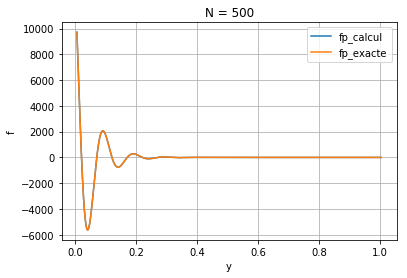

L'erreur d'approximation est 0.6227741917073057


In [8]:
# Schéma centrée du maillage irrégulier quand N = 500

a        = 3
n        = 500

x        = np.linspace(0,1,n)
dx       = x[1] - x[0]
y        = (1 - np.tanh((1 - x) * a))/np.tanh(a)

f        = 200  * np.exp(-20 * y) * (np.sin(20 * math.pi * y))
fp_e     = 4000 * np.exp(-20 * y) * (math.pi * np.cos(20 * math.pi * y)-np.sin(20 * math.pi * y))

fp_c     = np.zeros(len(f))

for i in range(1,n-1):
    fp_c[i] = (f[i+1] - f[i-1])/(y[i+1] - y[i-1])
    
    
#Extrapolation à l'extéreur de l'intervalle

y_g      =  (1 - np.tanh((1 - (0 - dx)) * a))/np.tanh(a)
y_d      =  (1 - np.tanh((1 - (1 + dx)) * a))/np.tanh(a)

f_g      = 200 * np.exp(- 20 * (y_g)) * (np.sin(20 * math.pi * (y_g)))
f_d      = 200 * np.exp(- 20 * (y_d)) * (np.sin(20 * math.pi * (y_d)))

fp_c[0]  = (f[1] - f_g)/(y[1] - y_g )
fp_c[-1] = (f_d - f[-2])/(y_d - y[-2])

e        = np.sqrt(dx * np.sum((np.abs(fp_c - fp_e) ** 2)))

plt.figure()
plt.title("N = %d" %n)
plt.xlabel("y")
plt.ylabel("f")
plt.grid()
plt.plot(y,fp_c,label="fp_calcul")
plt.plot(y,fp_e,label="fp_exacte")
plt.legend() 
plt.show()
    
print "L'erreur d'approximation est", e

On observe que pour N = 500, le maillage régulier a une erreur d'approximation de 3.7 mais le maillage irrégulier a une erreur d'approximation de 0.6, bien plus petit que le maillage régulier. Cela montre que le maillage irrégulier est plus adapté pour ce cas.
